# Graded Project 2 - Python for Data Science

## <font color='blue'> Problem Statement </font>
###  Analyse & formulate clusters for E-commerce company using Unsupervised Learning
- Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product.
- Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people.

###  Project Objective
Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

###  Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers'
measurements (etc.). The files provided are as follows:
- renttherunway-1.csv – data file.

## <font color='blue'> Load and explore data </font>

###  1. Import the required libraries and read the dataset.

In [1]:
## importing libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
## reading dataset

data = pd.read_csv(r'renttherunway.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


data

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


###  2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
## fetching first 5 records

data.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
## fetching basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [5]:
## fetching shape of dataframe

data.shape

(192544, 16)

In [6]:
## fetching size of data

data.size

3080704

In [7]:
## fetching dimension of dataframe

data.ndim

2

In [8]:
## fetching dimension of series in the dataframe

data["fit"].ndim

1

In [9]:
## checking the statistical summary of data

data.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [10]:
## checking the statistical summary of data -- for object type

data.describe(include = 'O')

,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,review_date
count,192544,174133,162562,192534,192482,177907,192199,192544,191867,192544
unique,3,106,190,9,191027,7,154736,68,24,2274
top,fit,34b,130lbs,wedding,.,hourglass,Stylist Review,dress,"5' 4""","June 15, 2016"
freq,142058,27285,14370,57784,63,55349,977,92884,28012,844


#### Inferences:
-     There are 192544 entries and 16 columns in the dataset
-     It consists of integer, float and object type of data
-     Entire size of data is: (192544 x 16) = 3080704
-     The dataframe is 2 dimentional (columns and rows); The entries of the column are 1 dimentional data
-     It is evident that there are some null entries also in some columns

## <font color='blue'> Data cleansing and Exploratory data analysis </font>

###  3. Check if there are any duplicate records in the dataset? If any, drop them.

In [11]:
## getting duplicate records in the dataset

data[data.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [12]:
## checking the shape of duplicate records in dataset

data[data.duplicated()].shape

(0, 16)

#### Inferences:
- From the above result, we can observe that there are no duplicate records found. Hence no record is dropped from the dataset

###  4. Drop the columns which you think redundant for the analysis.

In [13]:
## dropping columns - Unnamed, Ids, Review

data = data.drop(columns=data.columns[0])
data = data.drop(['user_id','item_id','review_text','review_summary'], axis = 1)

data.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,review_date
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"


#### Inferences:
-     We dropped 5 unnecessary columns namely: 'Unnamed: 0', 'user_id', 'item_id', 'review_text', 'review_summary'
-     Currently we have only 11 columns with 5 columns removed (16 - 5 = 11)

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [14]:
## checking null values in column "weight" and performing imputation for the null values

print('Total entries with null values in column "weight": ', data.weight.isnull().sum())

data[["weight"]] = data[["weight"]].fillna('0lbs')

Total entries with null values in column "weight":  29982


In [15]:
## removing 'lbs' from column "weight" and converting to float type

data.weight = [float(x.strip('lbs')) for x in data.weight]
data.weight

0         137.0
1         132.0
2           0.0
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

#### Inferences:
- Due to the presence of some null values, we cannot perform required weight data handling directly. Hence performing imputation for the missing entries initially
- Removed the 'lbs' from weight entries and converted it to float as per the requirement

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [16]:
## checking unique categories in the column 'rented for'

data['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [17]:
## Replacing 'party: cocktail' as 'party'

data['rented for'] = data['rented for'].replace({'party: cocktail':'party'})

data['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

#### Inferences:
-    Checked the unique attributes of "rented for" column and changed a selected category ('party: cocktail') to 'party'

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [18]:
## converting "height" column to inches by removing quotation mark

data.height = ['0' if 'nan' in x else ((float(str(x).split("'")[0]) * 12) + (float(str(x).split("'")[1].strip('"'))) )
                                          for x in data.height.astype(str)]
data.height = data.height.astype(float)

data.height

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

#### Inferences:
-    "Height" column is converted to Float datatype (dtype: float64)
-    Quotation mark has been removed and now height is in inches

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [19]:
## getting column-wise count of missing values

data.isnull().sum()

fit                0
bust size      18411
weight             0
rating            82
rented for        10
body type      14637
category           0
height             0
size               0
age              960
review_date        0
dtype: int64

In [20]:
## including imputation for missing entries

categorical_columns = data.select_dtypes('object')
numerical_columns = data.select_dtypes('float64')

for i in categorical_columns:
    data[i] = data[[i]].fillna('Missing')
    
for i in numerical_columns:
    data[i] = data[[i]].fillna(0)

In [21]:
data.isnull().sum()

fit            0
bust size      0
weight         0
rating         0
rented for     0
body type      0
category       0
height         0
size           0
age            0
review_date    0
dtype: int64

#### Inferences:
-    Total count of missing entries in each column is observed
-    All null or NaN values are imputed as: 
        - 0 for float datatype
        - 'Missing' for object datatype (string)
-    Finally, all column information is retrieved and it is verified that there are no null values in the dataset

### 9. Check the statistical summary for the numerical and categorical columns and write your findings

In [22]:
## checking the statistical summary of data

data.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,115.997751,9.088499,65.080984,12.245175,33.702141
std,53.726993,1.441995,4.691938,8.494877,8.384539
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [23]:
## checking the statistical summary of data -- for object type

data.describe(include = 'O')

,fit,bust size,rented for,body type,category,review_date
count,192544,192544,192544,192544,192544,192544
unique,3,107,9,8,68,2274
top,fit,34b,wedding,hourglass,dress,"June 15, 2016"
freq,142058,27285,57784,55349,92884,844


### Inferences:
- There are a total of 192544 records with 5 numerical columns and 6 object type columns
- It is evident that the minimum value of numerical values are 0 and the maximum vallues correspond to the respective columns values
- We have records of people from all age categories upto 117 (max age)
- We are also able to get the frequent occurances of body-type, category and rented-for purpose which helps us to derive the most preferred option of customers, therby helping to restock in the e-commerce business

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

<AxesSubplot:xlabel='age'>

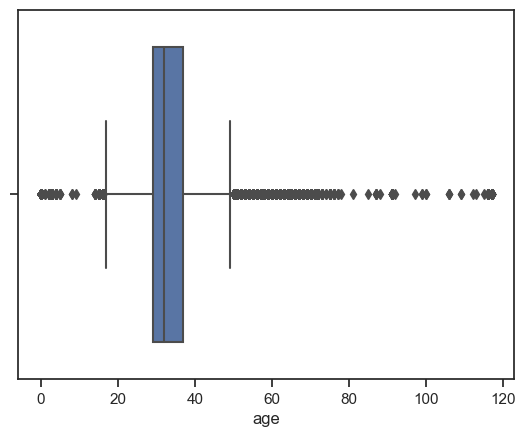

In [24]:
## plotting the box-plot of 'age' -- with outliers : before treatement

sns.boxplot(data['age'])

<AxesSubplot:xlabel='age'>

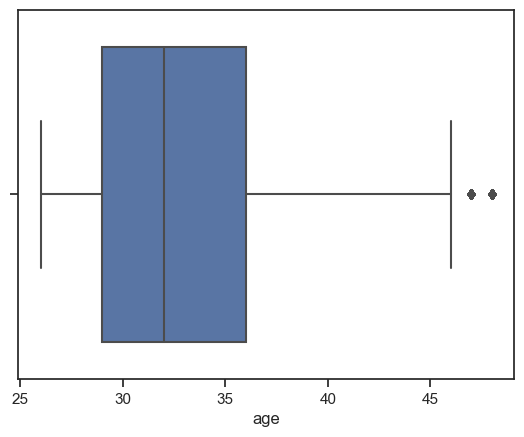

In [25]:
## plotting the box-plot of 'age' - after treating with transformation approach : after treatement

## IQR treatment for outliers

Q1 = data['age'].quantile(0.25)
Q2 = data['age'].quantile(0.5)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

upper_range = Q3 + 1.5*IQR
lower_range = Q3 - 1.5*IQR

data_df_filter = data.loc[(data['age'] > lower_range) & (data['age'] < upper_range)]


## plotting boxplot of IQR treated dataset

sns.boxplot(data_df_filter['age'])

#### Inferences:
- From the box-plot, it is evident that there are a lot of outliers available for the column 'age'
- So using the IQR treatment, the outliers are removed and minimised. The results of the same can be observed in the after treatment box-plot

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

<AxesSubplot:ylabel='rented for'>

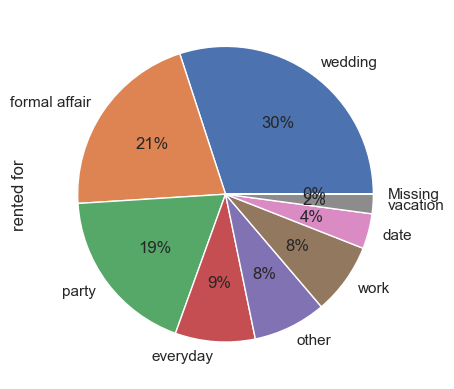

In [26]:
## plotting the distribution of column 'rented for' with percentage values in pie-chart

data['rented for'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

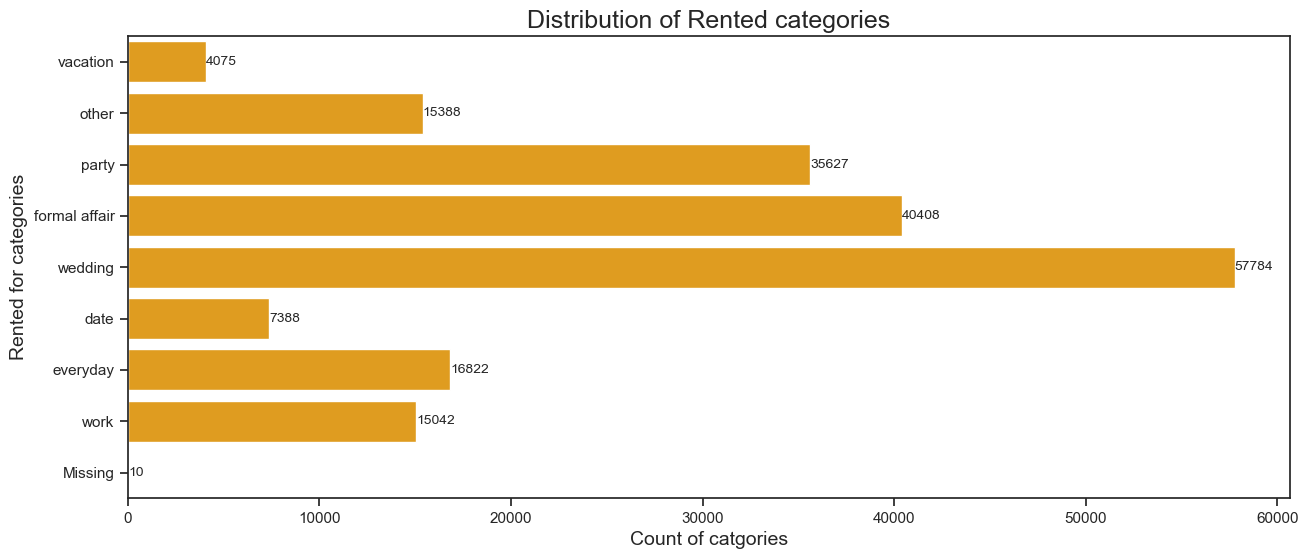

In [27]:
## count plot for 'rented for' column

plt.figure(figsize = (15, 6))
position_df = sns.countplot(y = data['rented for'], color = 'orange')

position_df.set_xlabel(xlabel = 'Count of catgories', fontsize = 14)
position_df.set_ylabel(ylabel = 'Rented for categories', fontsize = 14)
position_df.set_title(label = 'Distribution of Rented categories', fontsize = 18)

position_df.bar_label(position_df.containers[0], fontsize = 10)

plt.show()

#### Inferences:
- The above plots show the distribution of Rented-for categories over the dataset
- It is observed that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'
- The number of customers who rented their costumes for weddings range about 57784 (approx 58,000) which computes to 30% of total categories
- The least used purpose like 'vacation' includes about 4075 entries (2%) and 'date' includes 7388 entries (4%)

## <font color='blue'> Data Preparation for model building </font>

### 12. Encode the categorical variables in the dataset.

In [28]:
## get all columns with type 'Object'

#categorical_columns = data.select_dtypes('object')


## perform label encoding for selected columns

lbl_encoder = LabelEncoder()
for i in categorical_columns:
    data[i] = data[[i]].apply(lbl_encoder.fit_transform)
    
data.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,39,137.0,10.0,6,4,44,68.0,14,28.0,77
1,0,37,132.0,10.0,4,7,20,66.0,12,36.0,1189
2,0,106,0.0,10.0,5,0,45,64.0,4,116.0,411
3,0,38,135.0,8.0,3,5,16,65.0,8,34.0,607
4,0,37,145.0,10.0,7,2,20,69.0,12,27.0,2205


#### Inferences:
- All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique

### 13. Standardize the data, so that the values are within a particular range.

In [29]:
## Standardizing the columns

data_df = data.copy()
scaled_features = StandardScaler().fit_transform(data_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data_df.index, columns = data_df.columns)

scaled_features_df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,review_date
0,-0.556291,-0.295959,0.390908,0.632113,0.514533,0.178145,1.569310,0.622136,0.206575,-0.680080,-1.650564
1,-0.556291,-0.384988,0.297845,0.632113,-0.456520,1.763791,-0.307247,0.195872,-0.028862,0.274060,0.009280
2,-0.556291,2.686512,-2.159027,0.632113,0.029006,-1.936050,1.647500,-0.230392,-0.970608,9.815456,-1.152014
3,-0.556291,-0.340473,0.353683,-0.754859,-0.942047,0.706694,-0.620006,-0.017260,-0.499735,0.035525,-0.859452
4,-0.556291,-0.384988,0.539809,0.632113,1.000060,-0.878953,-0.307247,0.835268,-0.028862,-0.799347,1.525828


#### Inferences:
- The provided dataset is standardized using the Standard Scaler technique and all columns are brought to a particular range for performing computation and analysis

## <font color='blue'> Principal Component Analysis and Clustering </font>

###  14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [30]:
## step 1: Calculate the covariance matrix

cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00000519e+00,  2.50158302e-03,  1.08364122e-02,
        -2.42452840e-01,  8.42615981e-03, -6.72087822e-03,
         3.35892077e-04, -1.31716413e-03,  6.54006939e-02,
         1.17639094e-03, -6.37093934e-03],
       [ 2.50158302e-03,  1.00000519e+00, -1.29927221e-01,
        -2.82402302e-03,  3.80109361e-03, -2.38681523e-01,
        -8.12084214e-03,  3.53832782e-02,  3.69772205e-01,
         7.27856239e-02, -7.13724329e-03],
       [ 1.08364122e-02, -1.29927221e-01,  1.00000519e+00,
        -9.24412628e-03, -8.87810298e-04,  5.20226207e-02,
         3.00232412e-03,  8.02723021e-02,  8.77275791e-02,
         8.18843181e-02, -7.28809853e-03],
       [-2.42452840e-01, -2.82402302e-03, -9.24412628e-03,
         1.00000519e+00,  1.37572723e-02, -1.02927478e-02,
        -2.23637380e-02,  4.14759256e-03, -3.63556284e-02,
        -3.47509531e-02,  1.70288783e-02],
       [ 8.42615981e-03,  3.80109361e-03, -8.87810298e-04,
         1.37572723e-02,  1.00000519e+00, -1.92965568e-02,
  

In [31]:
## step 2: Calculate eigen values and eigen vectors

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen values: ', eig_values)
print('\n')
print('Eigen vectors: ',eig_vectors)

Eigen values:  [1.60006706 0.56549429 1.2606841  1.16741989 1.09553335 0.75155217
 0.79172095 0.8586313  0.90615731 1.01551503 0.98728168]


Eigen vectors:  [[ 0.10772778  0.09710262 -0.60756983 -0.33061147 -0.09436271  0.67638944
  -0.13541168 -0.07478029 -0.02527009 -0.08729558  0.04388905]
 [ 0.58628638  0.67072002  0.18288313 -0.16428793  0.12128744 -0.13074016
  -0.3130462   0.07117738 -0.00173364  0.05467178 -0.09003548]
 [-0.0168971   0.29748488 -0.27453788  0.60254192 -0.32164133 -0.11493514
  -0.08863996 -0.554615    0.19676945 -0.03454073  0.02756938]
 [-0.08636907  0.01386806  0.63488441  0.28597415 -0.00390193  0.67464719
  -0.20665954 -0.08136867  0.05054227  0.00386606 -0.02064187]
 [ 0.00378696  0.00775598  0.11674771 -0.22609709 -0.64604457 -0.01512795
   0.05697191  0.29127884  0.64752632  0.09259708 -0.04024209]
 [-0.43261916  0.06575998 -0.20627539  0.19095542 -0.01747858 -0.09731078
  -0.67773174  0.45010302 -0.0845941   0.10738922 -0.19780354]
 [-0.00387002  0.0015

In [32]:
## step 3: Scree plot

total = sum(eig_values)
var_exp = [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('Explained Variance: ', var_exp)
print('\n')
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [14.54598862320466, 11.460705023484067, 10.61285296685925, 9.959342323710944, 9.231906912837685, 8.9752414171179, 8.237750901087477, 7.8056985452096095, 7.197425839799436, 6.832256940669931, 5.140830506019036]


Cummulative Variance Explained:  [ 14.54598862  26.00669365  36.61954661  46.57888894  55.81079585
  64.78603727  73.02378817  80.82948671  88.02691255  94.85916949
 100.        ]


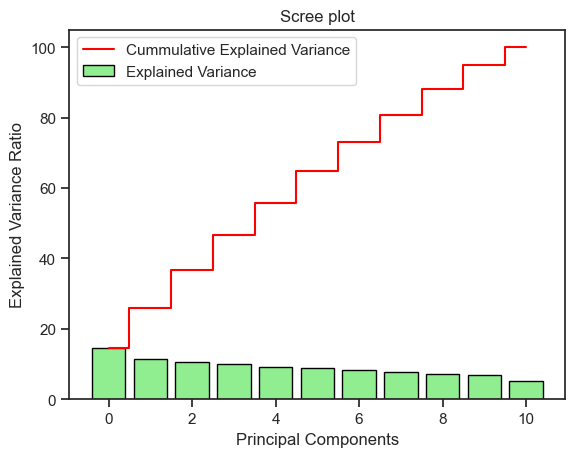

In [33]:
## Scree plot

plt.bar(range(11), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(11), cum_var_exp, where='mid', color='red', label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

- It is observed from the above Scree plot, that first 8 principal components are explaining about 90-95% of the variation.
- Hence, the optimal number of principal componets is chosen as 8

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)
    a. Find the optimal K Value using elbow plot for K Means clustering.
    b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
    c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [34]:
## Using dimensions obtained from PCA to apply clustering (i.e., 8)

pca = PCA(n_components = 8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.261814,-0.344099,-0.928432,0.831916,-0.717386,-1.003076,1.927426,-0.363477
1,-1.028131,-0.145141,-1.188197,0.020832,0.075603,0.548678,-0.527238,-0.623868
2,3.840496,-0.149712,-2.134635,2.927860,5.204590,3.441360,0.535006,-3.879734
3,-0.796669,0.564763,-0.564929,0.717638,-0.716902,0.761882,-0.405243,0.009602
4,-0.003712,-1.132790,-0.116376,-1.883286,-0.126987,-1.175654,-0.240027,0.449612


In [35]:
## Finding optimal K value by KMeans clustering using Elbow plot

cluster_errors = []
cluster_range = range(2,15)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)


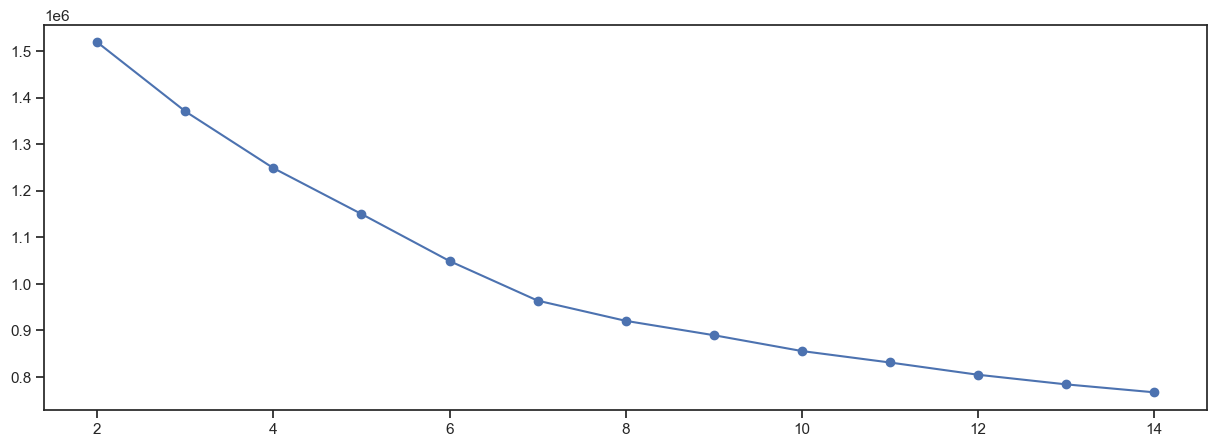

In [36]:
## creating a dataframe of number of clusters and cluster errors

cluster_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})


## Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_cluster'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

- From the above Elbow plot, it is observed that at cluster K=2, the inertia descreases significantly
- Hence we are selecting the optimal cluster value as K=2

In [43]:
## Applying KMeans clustering for optimal number of cluster obtained (K=2)

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=2, random_state=100)

In [44]:
## creating a dataframe of labels

label = pd.DataFrame(kmeans.labels_, columns=['Label'])


## joining the label dataframe to the pca_df dataframe

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,-0.261814,-0.344099,-0.928432,0.831916,-0.717386,-1.003076,1.927426,-0.363477,1
1,-1.028131,-0.145141,-1.188197,0.020832,0.075603,0.548678,-0.527238,-0.623868,1
2,3.840496,-0.149712,-2.134635,2.927860,5.204590,3.441360,0.535006,-3.879734,0
3,-0.796669,0.564763,-0.564929,0.717638,-0.716902,0.761882,-0.405243,0.009602,1
4,-0.003712,-1.132790,-0.116376,-1.883286,-0.126987,-1.175654,-0.240027,0.449612,1


In [45]:
kmeans_df['Label'].value_counts()

1    119709
0     72835
Name: Label, dtype: int64

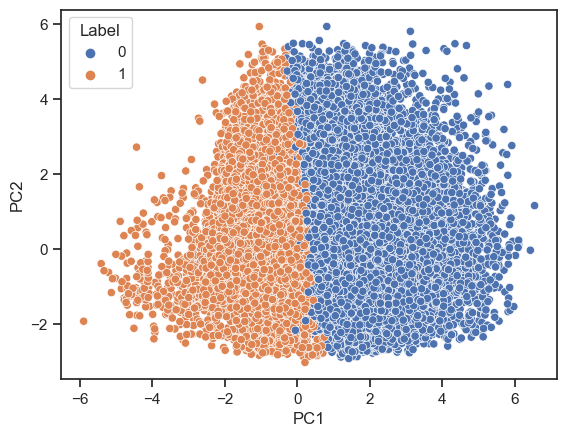

In [46]:
## visalizing the clusters formed 

sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label', data=kmeans_df)
plt.show()

In [61]:
## Compute silhouette score for evaluating the quality of the K Means clustering technique.

from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i, silhouette_score(pca_df, labels))

2 0.19979259714190498
3 0.13700863300193303
4 0.16863713194810842
5 0.1737716302915769
6 0.1549179688832393
7 0.1331652205618882
8 0.12623994757500956
9 0.12668779327137225
10 0.12862567257686636
11 0.12452374767059175
12 0.12984995728366264
13 0.12815292934642433
14 0.1201557842982198


In [47]:
## for 30000 sample data only

## Compute silhouette score for evaluating the quality of the K Means clustering technique.

kmeans_score1 = []

for i in range(2,15):
    kmeans_1 = KMeans(n_clusters = i)
    kmeans_1 = kmeans_1.fit(pca_df.head(30000))
    labels_1 = kmeans_1.predict(pca_df.head(30000))
    print(i, silhouette_score(pca_df.head(30000), labels_1))

2 0.19892293967520006
3 0.16968110176849835
4 0.16907517637255642
5 0.1736257805507947
6 0.12753133942124822
7 0.1330081689294993
8 0.12607487986227395
9 0.12883822924228888
10 0.12498444413173065
11 0.12995854777455337
12 0.12384459013874777
13 0.11986712231351038
14 0.12114939970577407


 - We have obtained the Silhoutte scores for various clusters. Further, it is observed from the above Silhoutte score, that the score is highest for cluster 2.
 - So we choose K=2 as the optimal cluster size in K Means clustering technique using the original scaled datasheet

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)
    a. Find the optimal K Value using dendrogram for Agglomerative clustering.
    b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
    c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. 
    (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [51]:
## Considering a sample dataset of 30000 records only to simplify the computation

scaled_features_sample = scaled_features[:30000,:]
print('Shape of scaled_features of the complete dataset: ', scaled_features.shape)
print('Shape of scaled_features of the sample dataset: ', scaled_features_sample.shape)

Shape of scaled_features of the complete dataset:  (192544, 11)
Shape of scaled_features of the sample dataset:  (30000, 11)


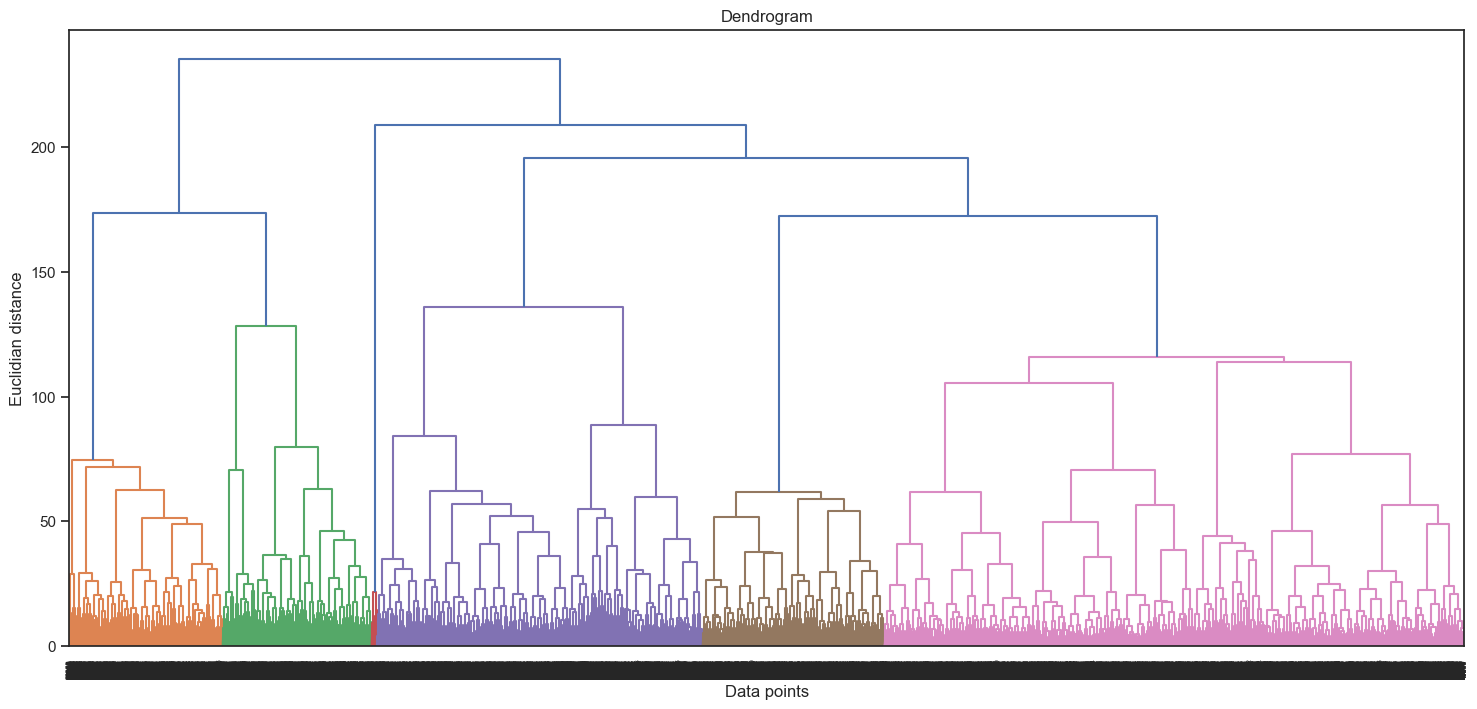

In [52]:
## Agglomerative clustering using original data :: sample dataset of 30000 records

plt.figure(figsize=[18,8])
merg = linkage(scaled_features_sample, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Data points')
plt.ylabel('Euclidian distance')
plt.title('Dendrogram')
plt.show()

In [53]:
## Building hierarchical clustering model using the optimal clusters as 2 for the sample dataset (30000 records)

hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df.head(30000))

In [54]:
## Creating a dataframe of the labels

df_label = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label.head()

,Labels
0,0
1,0
2,0
3,0
4,0


In [55]:
## Joining the label dataframes with unscaled initial cleaned dataframe (df_label)

df_hier = data_df.join(df_label)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,review_date,Labels
0,0,39,137.0,10.0,6,4,44,68.0,14,28.0,77,0.0
1,0,37,132.0,10.0,4,7,20,66.0,12,36.0,1189,0.0
2,0,106,0.0,10.0,5,0,45,64.0,4,116.0,411,0.0
3,0,38,135.0,8.0,3,5,16,65.0,8,34.0,607,0.0
4,0,37,145.0,10.0,7,2,20,69.0,12,27.0,2205,0.0


In [56]:
## Computing Silhoutte score from Agglomerative clustering

scaled_features_df_sample = scaled_features_df.head(30000)

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier = hier.fit(scaled_features_df_sample)
    labels = hier.fit_predict(scaled_features_df_sample)
    print(i, silhouette_score(scaled_features_df_sample, labels))

2 0.17573388636724116
3 0.18428004154384134
4 0.10825158071623867
5 0.12543066352528975
6 0.10488963976997619
7 0.11160901448683971
8 0.12079680165539673
9 0.07633593936914741
10 0.06964454312558323
11 0.057757786959353796
12 0.061927308233428575
13 0.06535340189215688
14 0.06781265551611343


 - We have obtained the Silhoutte scores for varios clusters. Further, it is observed from the above Silhoutte score, that the score is highest for cluster 3.
 - We obtain the optimal cluster size as K=3 for the considered sample subset of our original dataset in Agglomerative clustering model
 - But we choose K=2 as the optimal cluster size and built an Agglomerative clustering model using the original scaled datasheet (considering the entire dataset - where decrease in inertia is clearly steeply visible)

## <font color='blue'> Conclusion </font>

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

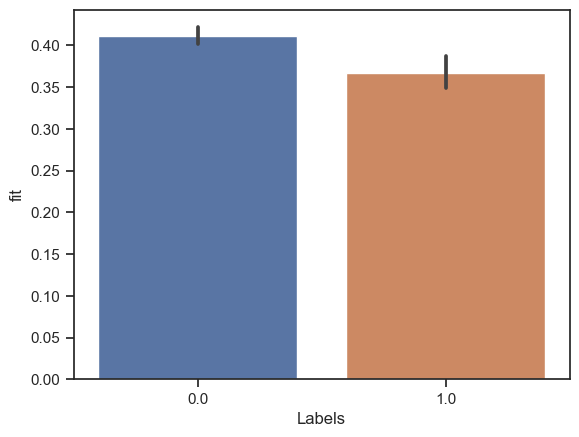

In [49]:
## Visualization and Interpretation of results

sns.barplot(df_hier['Labels'],df_hier['fit'])
plt.show()

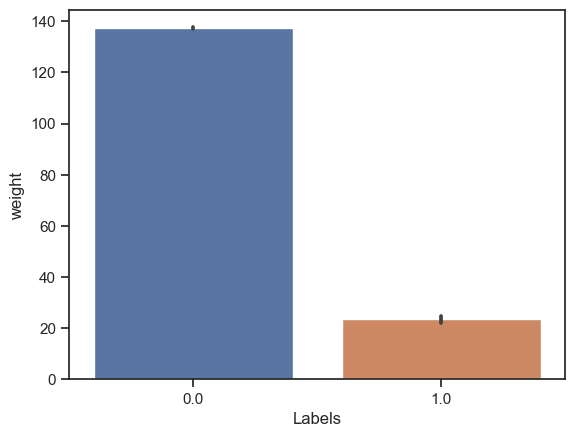

In [50]:
sns.barplot(df_hier['Labels'],df_hier['weight'])
plt.show()

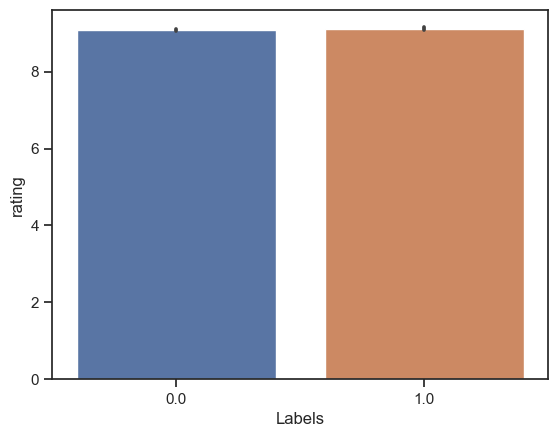

In [51]:
sns.barplot(df_hier['Labels'],df_hier['rating'])
plt.show()

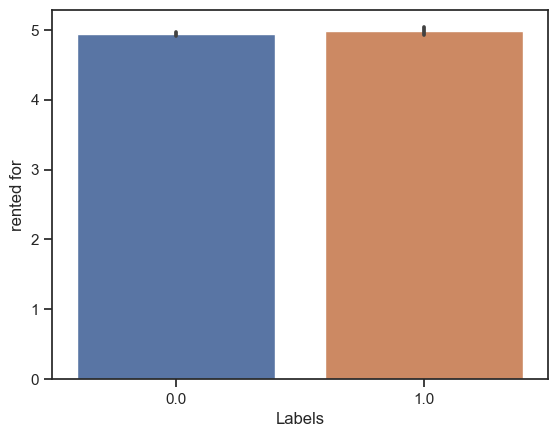

In [52]:
sns.barplot(df_hier['Labels'],df_hier['rented for'])
plt.show()

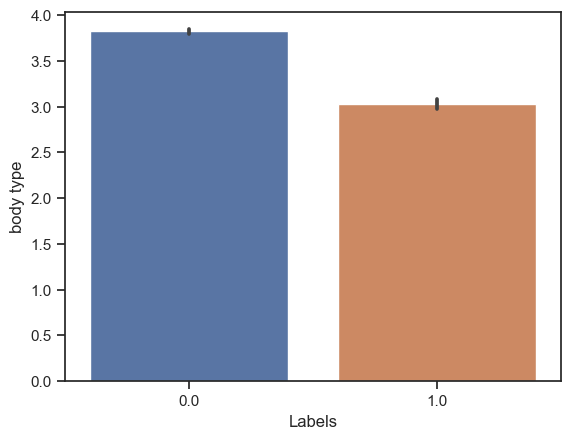

In [53]:
sns.barplot(df_hier['Labels'],df_hier['body type'])
plt.show()

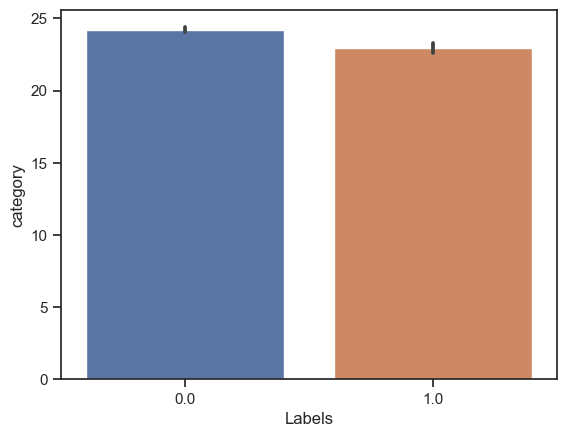

In [54]:
sns.barplot(df_hier['Labels'],df_hier['category'])
plt.show()

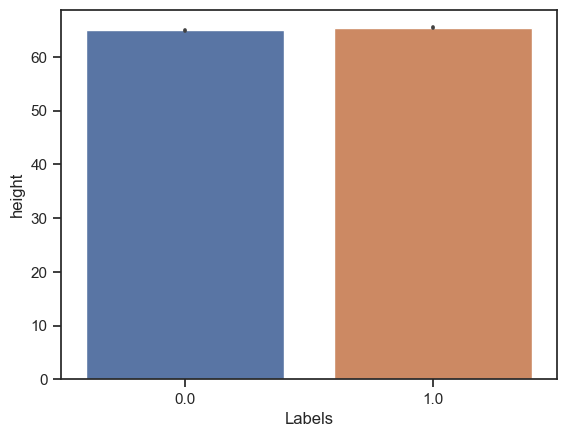

In [55]:
sns.barplot(df_hier['Labels'],df_hier['height'])
plt.show()

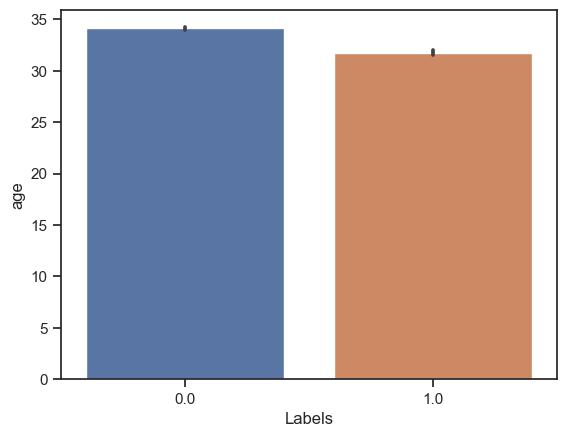

In [56]:
sns.barplot(df_hier['Labels'],df_hier['age'])
plt.show()

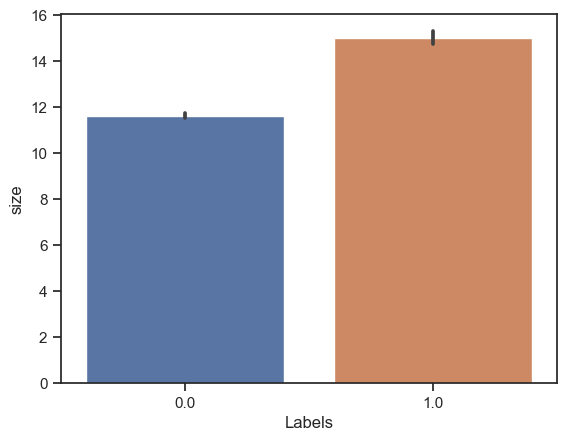

In [57]:
sns.barplot(df_hier['Labels'],df_hier['size'])
plt.show()

#### Inferences:
- Customers from cluster-0 are found with maximum fitting than cluster-1
- Height, Rented-for category and Rating of customers in Cluster-0 and Cluster-1 are almost the same/ equal
- Highly weighing customers are found in Cluster-0 whereas Cluster-1 has low weight customers
- Cluster-0 has most people with higher age category
- Cluster-1 has customers who demand for most varied sizes 


## Thank You!